# **Bank Customer Churn** #

In [2]:
%config IPCompleter.use_jedi=False


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Data Import**
The selected code imports essential data science libraries and configures the plotting environment. Here's a step-by-step explanation:

1. `import pandas as pd` - Imports the pandas library with the alias 'pd', which provides data structures and data analysis tools.

2. `import numpy as np` - Imports the numpy library with the alias 'np', which provides support for large, multi-dimensional arrays and mathematical functions.

3. `import matplotlib.pyplot as plt` - Imports the pyplot module from matplotlib with the alias 'plt', which provides a MATLAB-like plotting framework.

4. `import seaborn as sns` - Imports the seaborn library with the alias 'sns', which is built on matplotlib and provides a higher-level interface for creating attractive statistical graphics.

5. `%matplotlib inline` - This is a Jupyter notebook magic command that enables the inline display of matplotlib plots directly in the notebook, rather than opening them in a separate window.

read csv file

In [4]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



The selected code performs two operations related to loading and viewing data:

1. `df=pd.read_csv("Bank Customer Churn Prediction.csv")` - This line reads a CSV file named "Bank Customer Churn Prediction.csv" into a pandas DataFrame and assigns it to the variable `df`. The pandas library (imported as `pd`) provides the `read_csv()` function which is used to import data from CSV files.

2. `df.head()` - This line displays the first 5 rows of the DataFrame. The `head()` method is commonly used to quickly examine the structure and content of a DataFrame to verify that the data was loaded correctly.

# **Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB



The selected code `df.info()` is a pandas DataFrame method that provides a concise summary of the DataFrame.

When executed, this method displays:
- The number of rows and columns in the DataFrame
- The column names and their data types
- The number of non-null values in each column
- The memory usage of the DataFrame

This is a useful diagnostic function to quickly understand the structure of your DataFrame, check for missing values, and see what data types each column contains.

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



The selected code `df.describe()` generates summary statistics for a DataFrame.

This method calculates descriptive statistics for all numeric columns in the DataFrame, including:
- count (number of non-null values)
- mean (average)
- std (standard deviation)
- min (minimum value)
- 25% (first quartile)
- 50% (median/second quartile)
- 75% (third quartile)
- max (maximum value)

This is a quick way to understand the central tendency, dispersion, and shape of the distribution of your numeric data.

In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.loc[0,"gender"]

'Female'


The selected code `df.loc[0,"gender"]` accesses a specific value in a pandas DataFrame:

1. `df` refers to a pandas DataFrame
2. `.loc` is a pandas accessor method used for label-based indexing
3. `0` is the row index (accessing the first row of the DataFrame)
4. `"gender"` is the column name
5. Together, this code retrieves the value in the "gender" column of the first row (index 0) of the DataFrame

This is a common way to access a specific cell in a pandas DataFrame using row and column labels.

In [9]:
df["country"].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


The selected code `df["country"].value_counts()` performs a count of unique values in the "country" column of a DataFrame. Here's what it does:

1. `df["country"]` - Accesses the "country" column from the DataFrame named `df`
2. `.value_counts()` - Applies the value_counts() method to count the occurrences of each unique value in that column

This code will return a Series object where:
- The index contains the unique country names found in the column
- The values show how many times each country appears in the dataset
- By default, the results are sorted in descending order (most frequent countries first)

This is commonly used to understand the distribution of countries in your dataset.

In [10]:
df.sort_values("age")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1678,15569178,570,France,Female,18,4,82767.42,1,1,0,71811.90,0
4556,15796231,681,France,Female,18,1,98894.39,1,1,1,9596.40,0
9520,15673180,727,Germany,Female,18,2,93816.70,2,1,0,126172.11,0
9526,15665521,642,Germany,Male,18,5,111183.53,2,0,1,10063.75,0
9572,15641688,644,Spain,Male,18,7,0.00,1,0,1,59645.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3531,15653251,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
3033,15578006,787,France,Female,85,10,0.00,2,1,1,116537.96,0
2458,15813303,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
6443,15764927,753,France,Male,92,3,121513.31,1,0,1,195563.99,0



The selected code `df.sort_values("age")` sorts the DataFrame `df` by the values in the "age" column in ascending order. 

This method:
1. Takes the column name "age" as an argument
2. Returns a new DataFrame that is sorted by the values in the "age" column
3. By default, sorts in ascending order (smallest to largest)
4. Does not modify the original DataFrame unless assigned back to it

Note that since the result isn't being assigned to a variable, the sorted DataFrame will be displayed but the original `df` remains unchanged.

In [11]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


The selected code `df.columns` is a simple command that returns the column names of the DataFrame `df`. This is a property access that displays all the column headers in the DataFrame, which is useful for understanding what data is available in your DataFrame without having to view the entire dataset.

# **Exploratory Data Analysis** 

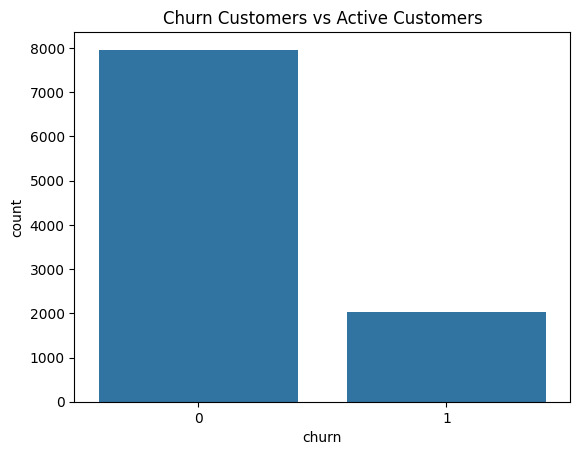

In [12]:
sns.countplot(x='churn',data=df)
plt.title("Churn Customers vs Active Customers")
plt.show()


The selected code creates a count plot to visualize the distribution of customer churn. Here's a step-by-step explanation:

1. `sns.countplot(x='churn',data=df)` - This uses Seaborn's countplot function to create a bar chart showing the count of observations for each category in the 'churn' column of the dataframe 'df'. Each bar represents the number of customers who either churned or remained active.

2. `plt.title("Churn Customers vs Active Customers")` - This adds a descriptive title to the plot, indicating that the visualization compares the number of customers who have churned versus those who remain active.

3. `plt.show()` - This displays the plot. Without this command, the plot would be created but not displayed in the notebook.

This visualization helps quickly understand the balance between churned and active customers in the dataset.

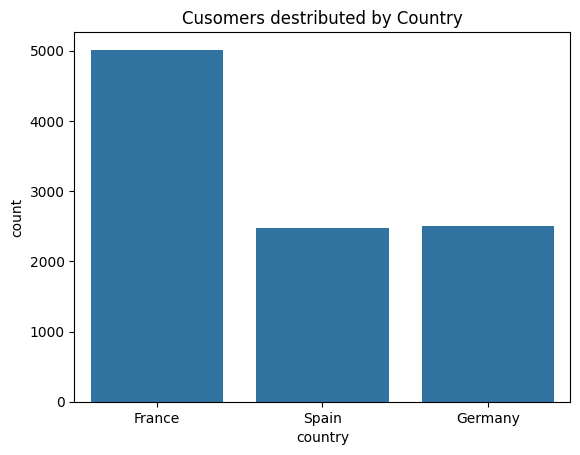

In [13]:
sns.countplot(x="country",data=df)
plt.title("Cusomers destributed by Country")
plt.show()


The selected code creates a count plot to visualize the distribution of customers by country. Here's a step-by-step explanation:

1. `sns.countplot(x="country", data=df)` - This uses Seaborn's countplot function to create a bar chart where:
   - `x="country"` specifies that the country column values should be on the x-axis
   - `data=df` indicates that the data comes from the DataFrame named df
   - Each bar's height represents the count of occurrences for each country value

2. `plt.title("Cusomers destributed by Country")` - This adds a title to the plot (note there's a typo in "Cusomers")

3. `plt.show()` - This displays the plot in the output cell of the Jupyter Notebook

This visualization helps quickly understand which countries have the most customers in the dataset.

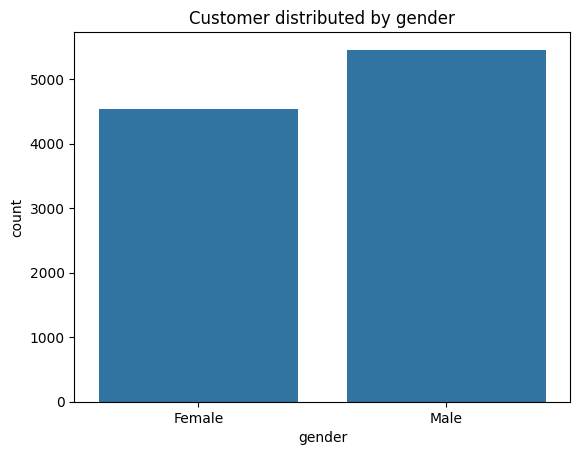

In [14]:
sns.countplot(x='gender',data=df)
plt.title("Customer distributed by gender")
plt.show()


The selected code creates a count plot to visualize the distribution of customers by gender. Here's a step-by-step explanation:

1. `sns.countplot(x='gender', data=df)` - This uses Seaborn's countplot function to create a bar chart showing the count of observations for each category in the 'gender' column of the dataframe 'df'.

2. `plt.title("Customer distributed by gender")` - This adds a title to the plot, describing what the visualization represents.

3. `plt.show()` - This displays the plot. In Jupyter notebooks, this command is often optional as plots are automatically displayed, but it's good practice to include it to ensure the plot is rendered.

This visualization will show bars representing the number of customers in each gender category, making it easy to compare the gender distribution in the dataset.

In [15]:
df["churn"].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

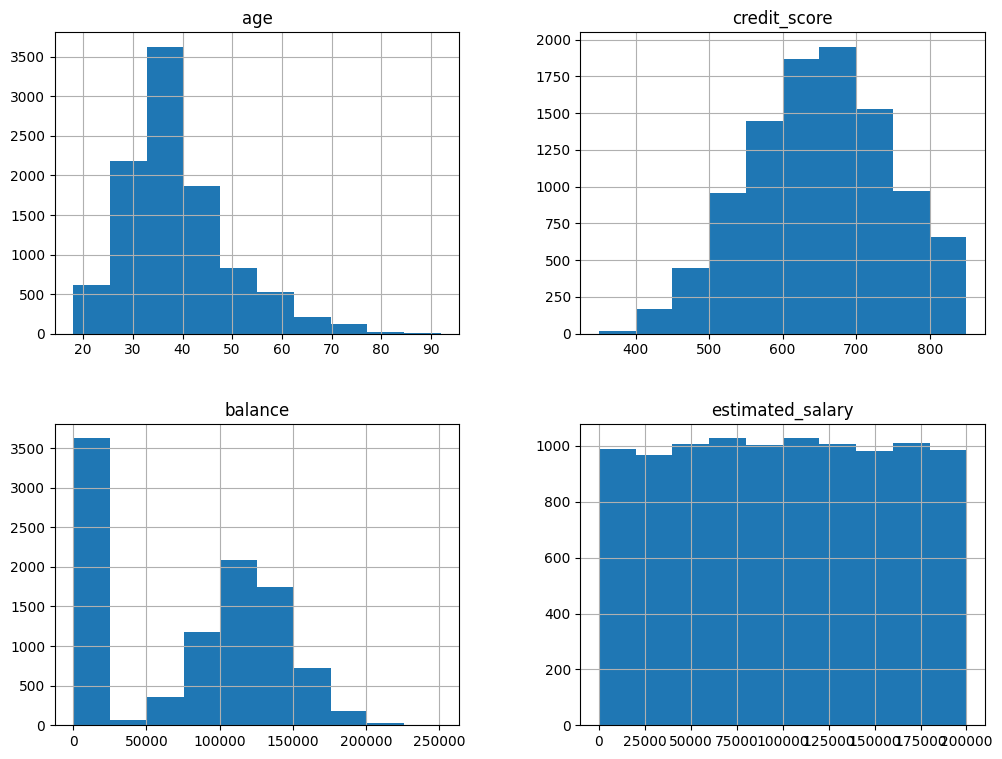

In [16]:
df[['age','credit_score','balance','estimated_salary']].hist(figsize=(12,9))
plt.show()


The selected code creates and displays histograms for multiple numerical columns in a DataFrame. Here's a step-by-step explanation:

1. `df[['age','credit_score','balance','estimated_salary']]` - This selects four specific numerical columns from the DataFrame `df`.

2. `.hist(figsize=(12,9))` - This calls the histogram method on the selected columns. Each column gets its own histogram in a grid layout. The `figsize=(12,9)` parameter sets the overall figure size to 12 inches wide by 9 inches tall.

3. `plt.show()` - This displays the created histograms on the screen.

This code is useful for quickly visualizing the distribution of multiple numerical variables at once, allowing you to see patterns like central tendency, spread, and potential outliers across these four financial/demographic attributes.

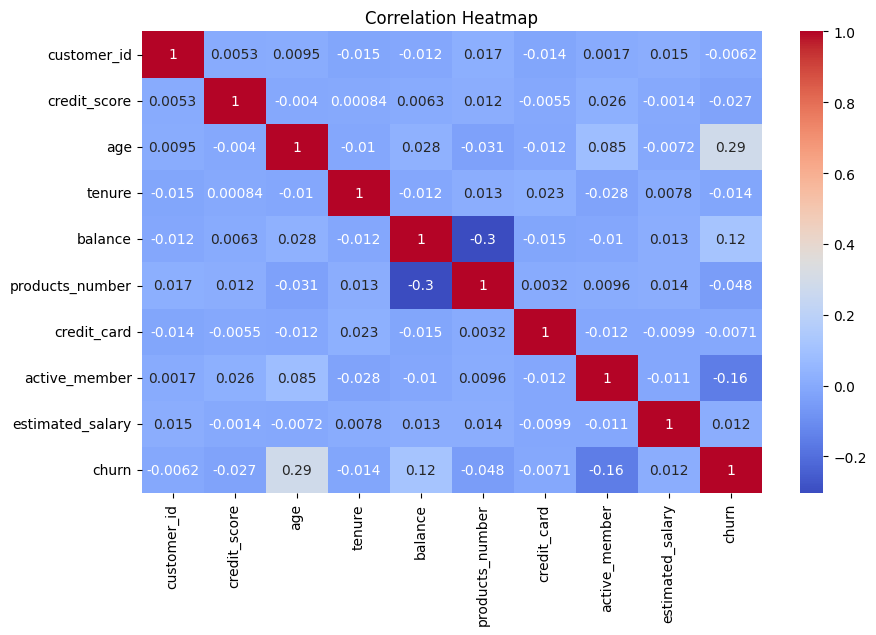

In [17]:
ndf=df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,6))
sns.heatmap(ndf.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


The selected code creates a correlation heatmap visualization. Here's a step-by-step explanation:

1. `ndf=df.select_dtypes(include=['int64','float64'])` - This line creates a new DataFrame called `ndf` that contains only the numeric columns (integers and floats) from the original DataFrame `df`.

2. `plt.figure(figsize=(10,6))` - Creates a new Matplotlib figure with dimensions of 10 inches wide by 6 inches tall.

3. `sns.heatmap(ndf.corr(),annot=True,cmap="coolwarm")` - Creates a heatmap using Seaborn:
   - `ndf.corr()` calculates the correlation matrix between all numeric columns
   - `annot=True` displays the correlation values in each cell
   - `cmap="coolwarm"` sets the color scheme (blue for negative correlations, red for positive)

4. `plt.title("Correlation Heatmap")` - Adds a title to the plot.

5. `plt.show()` - Displays the heatmap.

# **Feature Engineering**

In [18]:
df["gender"]=df["gender"].map({'Male':1,'Female':0})
df["credit_score"]=df['credit_score'].map({'Yes':1,'No':0})
df["active_member"]=df["active_member"].map({'Yes':1,'No':0})
df=pd.get_dummies(df,columns=['country'],drop_first=True)



The selected code is transforming categorical variables in a DataFrame into numerical format, which is often necessary for machine learning algorithms. Here's a step-by-step explanation:

1. `df["gender"]=df["gender"].map({'Male':1,'Female':0})` - This line converts the "gender" column from categorical values ('Male', 'Female') to numerical values (1, 0).

2. `df["credit_score"]=df['credit_score'].map({'Yes':1,'No':0})` - This line converts the "credit_score" column from categorical values ('Yes', 'No') to numerical values (1, 0).

3. `df["active_member"]=df["active_member"].map({'Yes':1,'No':0})` - This line converts the "active_member" column from categorical values ('Yes', 'No') to numerical values (1, 0).

4. `df=pd.get_dummies(df,columns=['country'],drop_first=True)` - This line uses pandas' get_dummies function to perform one-hot encoding on the 'country' column. The `drop_first=True` parameter removes the first category to avoid the dummy variable trap, which helps prevent multicollinearity in regression models.

In [19]:
x=df.drop(["churn"],axis=1)
y=df['churn']
print(x,y)

      customer_id  credit_score  gender  age  tenure    balance  \
0        15634602           NaN       0   42       2       0.00   
1        15647311           NaN       0   41       1   83807.86   
2        15619304           NaN       0   42       8  159660.80   
3        15701354           NaN       0   39       1       0.00   
4        15737888           NaN       0   43       2  125510.82   
...           ...           ...     ...  ...     ...        ...   
9995     15606229           NaN       1   39       5       0.00   
9996     15569892           NaN       1   35      10   57369.61   
9997     15584532           NaN       0   36       7       0.00   
9998     15682355           NaN       1   42       3   75075.31   
9999     15628319           NaN       0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  \
0                   1            1            NaN         101348.88   
1                   1            0            NaN    


The selected code is performing data preparation for a machine learning task, specifically separating features from the target variable. Here's a step-by-step explanation:

1. `x=df.drop(["customer_id","churn"],axis=1)` - This creates a new DataFrame called `x` that contains all columns from the original DataFrame `df` except for "customer_id" and "churn". The `axis=1` parameter specifies that columns (not rows) should be dropped.

2. `y=df['churn']` - This creates a Series called `y` that contains only the "churn" column from the original DataFrame. This will be used as the target variable for prediction.

3. `print(x,y)` - This prints both the feature DataFrame `x` and the target Series `y` to inspect their contents.

This is a common pattern in machine learning workflows where you separate your data into features (independent variables) and the target (dependent variable) before training a model.

# **Model Selection**

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)



The selected code uses scikit-learn's train_test_split function to divide data into training and testing sets. Here's a step-by-step explanation:

1. `from sklearn.model_selection import train_test_split` - Imports the train_test_split function from scikit-learn's model_selection module.

2. `X_train,X_test,Y_train,Y_test=train_test_split(...)` - Calls the function and unpacks its return values into four variables:
   - X_train: Features for training
   - X_test: Features for testing
   - Y_train: Target values for training
   - Y_test: Target values for testing

3. `x,y` - The input data being split (features and target variables)

4. `test_size=0.2` - Specifies that 20% of the data should be used for testing (80% for training)

5. `random_state=42` - Sets a seed for the random number generator to ensure reproducible results

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)


The selected code creates and trains a Random Forest Classifier model. Here's a step-by-step explanation:

1. `from sklearn.ensemble import RandomForestClassifier` - This imports the RandomForestClassifier class from scikit-learn's ensemble module.

2. `model=RandomForestClassifier(random_state=42)` - This creates a new Random Forest Classifier model instance. The `random_state=42` parameter ensures reproducibility by setting a fixed seed for the random number generator.

3. `model.fit(x_train,y_train)` - This trains the model using the training data. `x_train` contains the feature variables, and `y_train` contains the target variable (what you're trying to predict). The model learns patterns from this data to make future predictions.

In [22]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 1]



The selected code performs prediction using a trained machine learning model and displays the results. Here's a step-by-step explanation:

1. `y_pred = model.predict(x_test)` - This line uses the trained model's `predict()` method to make predictions on the test data (`x_test`). The model processes the input features and returns the predicted values.

2. `print(y_pred)` - This line displays the prediction results in the notebook output. The predictions could be class labels (for classification) or continuous values (for regression), depending on the type of model being used.

This code is typically used to evaluate how well a trained model performs on unseen data.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=["credit_score","age","balance","estimated_salary"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols] = df[num_cols].fillna(0)

df[num_cols]=scaler.fit_transform(df[num_cols])


The selected code demonstrates how to standardize numerical features in a dataset using scikit-learn's StandardScaler. Here's a step-by-step explanation:

1. `from sklearn.preprocessing import StandardScaler` - Imports the StandardScaler class from scikit-learn's preprocessing module.

2. `scaler=StandardScaler()` - Creates an instance of the StandardScaler class.

3. `num_cols=["credit_score","age","balance","estimated_salary"]` - Defines a list of column names that contain numerical data to be standardized.

4. `df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')` - Converts the selected columns to numeric data types, with 'coerce' option to handle any non-numeric values by converting them to NaN.

5. `df[num_cols] = df[num_cols].fillna(0)` - Replaces any NaN values in the numerical columns with zeros.

6. `df[num_cols]=scaler.fit_transform(df[num_cols])` - Standardizes the numerical columns by:
   - Fitting the scaler to learn the mean and standard deviation of each feature
   - Transforming the data by subtracting the mean and dividing by the standard deviation
   - This results in features with zero mean and unit variance

# **Model Training**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2]
}


The selected code imports and sets up a Random Forest classifier with hyperparameter tuning. Here's a step-by-step explanation:

1. `from sklearn.ensemble import RandomForestClassifier` - Imports the Random Forest classifier algorithm from scikit-learn's ensemble module.

2. `from sklearn.model_selection import GridSearchCV` - Imports GridSearchCV, which is used for hyperparameter tuning through exhaustive search.

3. `rf = RandomForestClassifier(random_state=42)` - Creates a Random Forest classifier instance with a fixed random seed (42) for reproducibility.

4. `rf.fit(x_train, y_train)` - Trains the Random Forest model on the training data.

5. `param_grid = {...}` - Defines a dictionary of hyperparameters to tune:
   - "n_estimators": [50, 100] - Tests both 50 and 100 decision trees in the forest
   - "max_depth": [None, 10] - Tests unlimited depth and a maximum depth of 10 levels
   - "min_samples_split": [2] - Sets the minimum number of samples required to split a node to 2

This code prepares for a grid search to find the optimal combination of these hyperparameters.

In [25]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,              # 5 → 3
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             scoring='accuracy')


The selected code creates and runs a grid search for hyperparameter tuning of a Random Forest model. Here's a step-by-step explanation:

1. `GridSearchCV()` - Creates a grid search object that will systematically work through multiple combinations of parameter values, cross-validating as it goes.

2. `estimator=rf` - Specifies the machine learning algorithm to use (a Random Forest classifier that was defined earlier).

3. `param_grid=param_grid` - Defines the hyperparameters and their possible values to search through (defined elsewhere in the code).

4. `cv=3` - Sets the cross-validation splitting strategy to 3 folds (the code comment indicates this was reduced from 5 to 3).

5. `scoring="accuracy"` - Specifies that accuracy should be used to evaluate model performance.

6. `n_jobs=-1` - Uses all available processor cores to speed up the search.

7. `grid.fit(x_train, y_train)` - Runs the grid search on the training data to find the best hyperparameters.

In [26]:
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [27]:
best_model = grid.best_estimator_

In [28]:
y_pred_tuned = best_model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.853
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.43      0.54       393

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000




The selected code evaluates the performance of a classification model. Here's a step-by-step explanation:

1. `from sklearn.metrics import accuracy_score,classification_report` - Imports two evaluation metrics from scikit-learn's metrics module.

2. `print("Accuracy",accuracy_score(y_test,y_pred))` - Calculates and prints the accuracy score of the model by comparing the predicted labels (`y_pred`) against the true labels (`y_test`).

3. `print(classification_report(y_test,y_pred))` - Generates and prints a detailed classification report that includes precision, recall, F1-score, and support for each class. This provides a more comprehensive evaluation of the model's performance than accuracy alone.

These metrics help assess how well the classification model is performing on the test data.

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1536   71]
 [ 223  170]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.43      0.54       393

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000




The selected code evaluates a random forest classifier's performance using confusion matrix and classification report. Here's a step-by-step explanation:

1. `from sklearn.metrics import confusion_matrix, classification_report` - Imports two evaluation metrics from scikit-learn's metrics module.

2. `y_pred = rf.predict(x_test)` - Uses the trained random forest model (`rf`) to make predictions on the test data (`x_test`), storing the results in `y_pred`.

3. `print(confusion_matrix(y_test, y_pred))` - Calculates and displays the confusion matrix, which shows the counts of true positives, false positives, true negatives, and false negatives by comparing the actual values (`y_test`) with the predicted values.

4. `print(classification_report(y_test, y_pred))` - Generates and displays a text report with precision, recall, F1-score, and support metrics for each class, providing a comprehensive view of the classifier's performance.

In [31]:
importance=model.feature_importances_
feature_img=pd.DataFrame({
    'Feature':x.columns,
    'Importance':importance
}).sort_values(by="Importance",ascending=False)
feature_img.head(10)

,Feature,Importance
3,age,0.232531
9,estimated_salary,0.160968
0,customer_id,0.159187
5,balance,0.152348
6,products_number,0.137409
4,tenure,0.084951
10,country_Germany,0.025994
7,credit_card,0.017512
2,gender,0.017386
11,country_Spain,0.011712



The selected code extracts and displays feature importance from a trained model. Here's a step-by-step explanation:

1. `importance=model.feature_importances_` - This line retrieves the feature importance scores from a previously trained model (likely a tree-based model like Random Forest or Gradient Boosting) and assigns them to the variable `importance`.

2. `feature_img=pd.DataFrame({...})` - This creates a new pandas DataFrame with two columns:
   - `'Feature'`: Contains the column names from the feature dataset `x`
   - `'Importance'`: Contains the importance scores for each feature

3. `.sort_values(by="Importance",ascending=False)` - This sorts the DataFrame by the importance scores in descending order (highest importance first).

4. `feature_img.head(10)` - This returns the top 10 most important features from the sorted DataFrame.

This code is commonly used in machine learning workflows to identify which features have the most influence on a model's predictions.

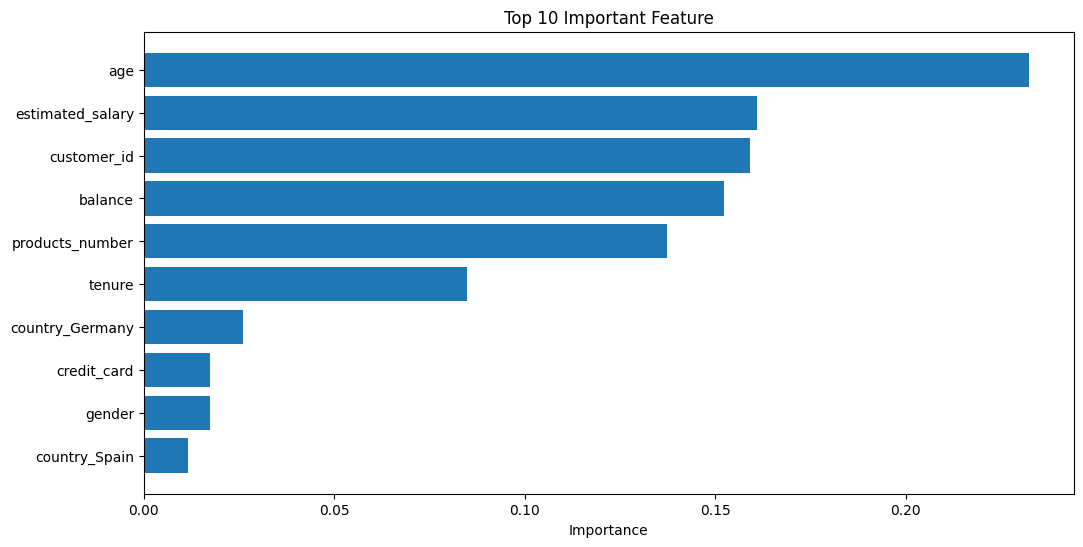

In [32]:
plt.figure(figsize=(12,6))
plt.barh(feature_img['Feature'][:10],feature_img['Importance'][:10])
plt.xlabel("Importance")
plt.title("Top 10 Important Feature")
plt.gca().invert_yaxis()
plt.show()


The selected code creates a horizontal bar chart showing the top 10 important features. Here's a step-by-step explanation:

1. `plt.figure(figsize=(10,6))` - Creates a new figure with a width of 10 inches and height of 6 inches.

2. `plt.barh(feature_img['Feature'][:10],feature_img['Importance'][:10])` - Creates a horizontal bar chart using:
   - The first 10 values from the 'Feature' column as y-axis labels
   - The first 10 values from the 'Importance' column as the length of each bar

3. `plt.xlabel("Importance")` - Adds a label to the x-axis.

4. `plt.title("Top 10 Important Feature")` - Adds a title to the plot.

5. `plt.gca().invert_yaxis()` - Inverts the y-axis so that the most important feature appears at the top.

6. `plt.show()` - Displays the plot.

In [33]:
df.groupby('active_member')['churn'].mean()

Series([], Name: churn, dtype: float64)


The selected code `df.groupby('active_member')['churn'].mean()` calculates the average churn rate for each category of active members. Here's a step-by-step explanation:

1. `df.groupby('active_member')` - Groups the DataFrame by the 'active_member' column, creating separate groups for each unique value in that column (likely True/False or 1/0)

2. `['churn']` - Selects only the 'churn' column from each group (churn likely represents whether a customer has left the service, typically 1 for churned and 0 for retained)

3. `.mean()` - Calculates the mean (average) of the churn values for each active_member group

The result will show the proportion of customers who churned in each active_member category, effectively showing if active members are more or less likely to churn than inactive members.

In [34]:
df.groupby('gender')['churn'].mean()

gender
0    0.250715
1    0.164559
Name: churn, dtype: float64


The selected code `df.groupby('gender')['churn'].mean()` calculates the average churn rate for each gender group. Here's a step-by-step explanation:

1. `df.groupby('gender')` - This groups the DataFrame by the 'gender' column, creating separate groups for each unique gender value.

2. `['churn']` - This selects only the 'churn' column from each group.

3. `.mean()` - This calculates the mean (average) value of the 'churn' column for each gender group.

The result will be a Series showing the average churn rate for each gender category in the dataset.

In [35]:
df.groupby('products_number')['churn'].mean()

products_number
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64


The selected code `df.groupby('products_number')['churn'].mean()` performs a grouped calculation on a DataFrame. Here's what it does step by step:

1. `df.groupby('products_number')` - Groups the DataFrame by the values in the 'products_number' column, creating groups where each group contains all rows with the same product number.

2. `['churn']` - Selects only the 'churn' column from each group.

3. `.mean()` - Calculates the mean (average) value of the 'churn' column for each group.

This code is calculating the average churn rate for each distinct number of products. The result will show how the churn rate varies based on how many products a customer has.

In [36]:
df.groupby('age')['churn'].mean().head()

age
-1.994969    0.090909
-1.899615    0.037037
-1.804262    0.050000
-1.708908    0.056604
-1.613554    0.142857
Name: churn, dtype: float64


The selected code `df.groupby('age')['churn'].mean().head()` performs a data aggregation and displays the first few results. Here's what it does step by step:

1. `df.groupby('age')` - Groups the DataFrame by the 'age' column, creating groups where each contains all rows with the same age value
  
2. `['churn']` - Selects only the 'churn' column from each group (churn likely contains binary values indicating whether customers left the service)

3. `.mean()` - Calculates the mean value of the 'churn' column for each age group, effectively giving you the churn rate by age

4. `.head()` - Returns only the first 5 rows of the resulting Series

This code is useful for analyzing how churn rates vary across different age groups in your dataset.

In [37]:
df["churn"].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


The selected code `df["churn"].value_counts(normalize=True)` performs the following operations:

1. `df["churn"]` - Accesses the "churn" column from the DataFrame `df`

2. `.value_counts()` - Counts the frequency of each unique value in the "churn" column

3. `normalize=True` - This parameter converts the raw counts into proportions (or percentages) of the total

This code will return a Series object showing the relative frequency (proportion) of each unique value in the "churn" column, with the values sorted in descending order of frequency. This is useful for seeing the distribution of the churn variable as percentages rather than raw counts.

# **Conclusion:**
This project successfully predicts customer churn using machine learning techniques. Random Forest achieved strong performance and can help banks identify customers at risk of leaving, enabling proactive retention strategies.

In [38]:
import pandas as pd

df = pd.read_csv("Bank Customer Churn Prediction.csv")
print(df.columns)


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Train model
model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)

# Save scaler & model

joblib.dump(scaler, "scaler.pkl")
joblib.dump(model, "model.pkl")


C:\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\anaconda\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


['model.pkl']

In [40]:
print(x_train.isnull().sum())
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)


customer_id            0
credit_score        8000
gender                 0
age                    0
tenure                 0
balance                0
products_number        0
credit_card            0
active_member       8000
estimated_salary       0
country_Germany        0
country_Spain          0
dtype: int64


In [41]:
# Numeric column – median se fill
x["credit_score"] = x["credit_score"].fillna(x["credit_score"].median())


# active_member usually 0/1 hota hai → mode se fill
x["active_member"] = x["active_member"].fillna(0)


In [42]:
x["credit_score"] = x["credit_score"].fillna(650)
print(x.isnull().sum())

customer_id         0
credit_score        0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
country_Germany     0
country_Spain       0
dtype: int64


In [43]:
joblib.dump(scaler, "scaler1.pkl")
joblib.dump(model, "model1.pkl")

['model1.pkl']

In [45]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(value=5)
display(slider)

IntSlider(value=5)

In [48]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# --------- INPUT FIELDS ----------
credit_score = widgets.IntText(
    description="Credit Score:",
    value=650,
    style={"description_width": "140px"}
)

age = widgets.IntText(
    description="Age:",
    value=30,
    style={"description_width": "140px"}
)

balance = widgets.FloatText(
    description="Balance:",
    value=50000,
    style={"description_width": "140px"}
)

salary = widgets.FloatText(
    description="Salary:",
    value=60000,
    style={"description_width": "140px"}
)

# --------- BUTTON ----------
predict_btn = widgets.Button(
    description="Predict",
    button_style="success"
)

# --------- OUTPUT ----------
output = widgets.Output()

# --------- FUNCTION ----------
def predict_churn(b):
    with output:
        clear_output()
        
        # Dummy logic (replace with ML model later)
        if credit_score.value < 500 or balance.value < 20000:
            result = "❌ Customer Will Churn"
        else:
            result = "✅ Customer Will Stay"
        
        print("🔍 Prediction Result:")
        print(result)

# Button click event
predict_btn.on_click(predict_churn)

# --------- UI LAYOUT ----------
ui = widgets.VBox([
    widgets.HTML("<h3>🏦 Bank Churn Prediction App</h3>"),
    credit_score,
    age,
    balance,
    salary,
    predict_btn,
    output
])

display(ui)
